In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
data = pd.read_csv('train.csv')

In [198]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [199]:
#drop id column
data.drop('Id', axis=1, inplace=True)

In [200]:
# categorical columns
categorical_cols = data.select_dtypes(include='object').columns

# numerical columns
numerical_cols = data.select_dtypes(include='number').columns

In [201]:
data[numerical_cols]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [202]:
data[numerical_cols].isna().sum()

,0
MSSubClass,0
LotFrontage,259
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,8
BsmtFinSF1,0
BsmtFinSF2,0


In [203]:
# correlation
data[numerical_cols].corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


best columns are 'OverallQual','GrLivArea'

In [204]:
X= data['GrLivArea']
Y = data['SalePrice']

In [205]:
X.shape, Y.shape

((1460,), (1460,))

In [206]:
# normalize X and Y
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X.values.reshape(-1, 1))
Y = scaler.fit_transform(Y.values.reshape(-1, 1))

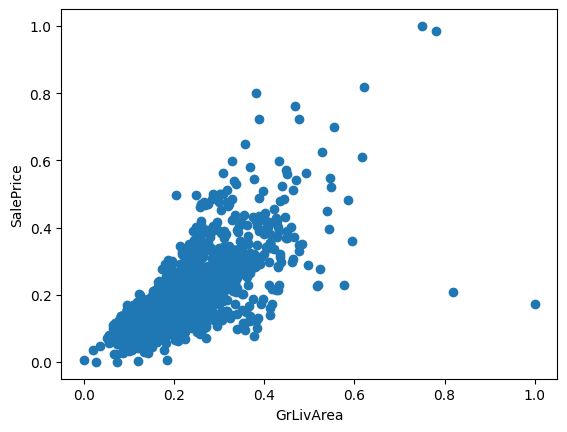

In [207]:
# scatter plot of X and Y
plt.scatter(X, Y)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [208]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1168, 1), (292, 1), (1168, 1), (292, 1))

# linear regression model

In [209]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train.reshape(-1, 1), Y_train)

LinearRegression()

In [210]:
# calculate mse and mae
from sklearn.metrics import mean_squared_error, mean_absolute_error

Y_pred = lr.predict(X_test.reshape(-1, 1))

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print(f"The mean squared error is {mse}")
print(f"The mean absolute error is {mae}")

The mean squared error is 0.006593358027953706
The mean absolute error is 0.053244277845328515


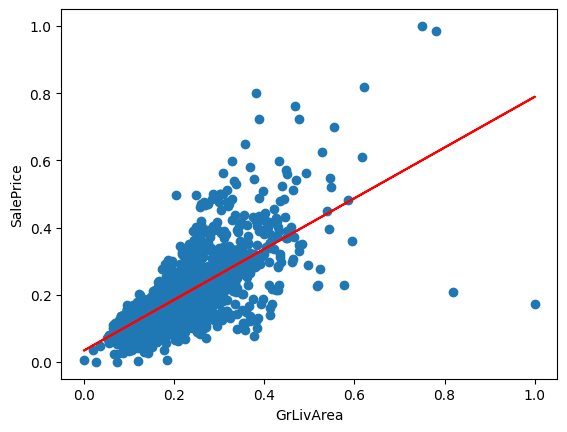

In [211]:
# show plot and best fit line

plt.scatter(X, Y)
plt.plot(X, lr.predict(X), color='red')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# multiple linear regression

In [212]:
X_mul = data[['OverallQual','GrLivArea']]
Y_mul = data['SalePrice']

X_mul.shape, Y_mul.shape

((1460, 2), (1460,))

In [213]:
X_mul = scaler.fit_transform(X_mul) # Remove .values since X_mul is already a numpy array
Y_mul = scaler.fit_transform(Y_mul.values.reshape(-1, 1)) # Keep .values for Y_mul (Series) and reshape

In [214]:
# split
X_mul_train, X_mul_test, Y_mul_train, Y_mul_test = train_test_split(X_mul, Y_mul, test_size=0.2, random_state=42)

X_mul_train.shape, X_mul_test.shape, Y_mul_train.shape, Y_mul_test.shape

((1168, 2), (292, 2), (1168, 1), (292, 1))

In [215]:
# apply multiple regression

lr_mul = LinearRegression()
lr_mul.fit(X_mul, Y_mul)

LinearRegression()

In [216]:
Y_mul_pred = lr_mul.predict(X_mul_test)

mse_mul = mean_squared_error(Y_mul_test, Y_mul_pred)
mae_mul = mean_absolute_error(Y_mul_test, Y_mul_pred)

print(f"The mean squared error is {mse_mul}")
print(f"The mean absolute error is {mae_mul}")

The mean squared error is 0.003696139406581687
The mean absolute error is 0.03985292872913282


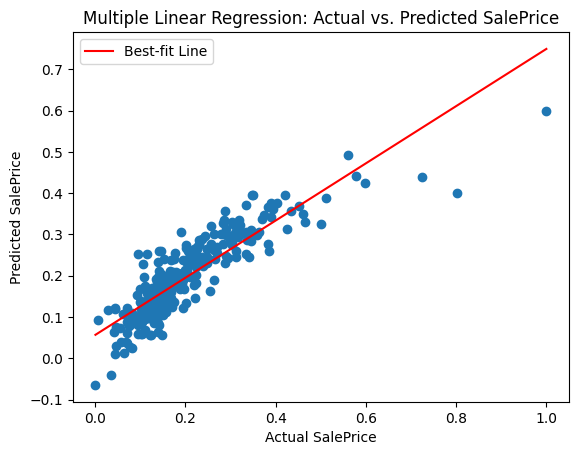

In [217]:
# Scatter plot
plt.scatter(Y_mul_test, Y_mul_pred)
slope, intercept = np.polyfit(Y_mul_test.ravel(), Y_mul_pred.ravel(), 1)

x_line = np.linspace(Y_mul_test.min(), Y_mul_test.max(), 100)
y_line = slope * x_line + intercept

# Plot the best-fit line
plt.plot(x_line, y_line, color='red', label='Best-fit Line')

plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Multiple Linear Regression: Actual vs. Predicted SalePrice')
plt.legend()
plt.show()

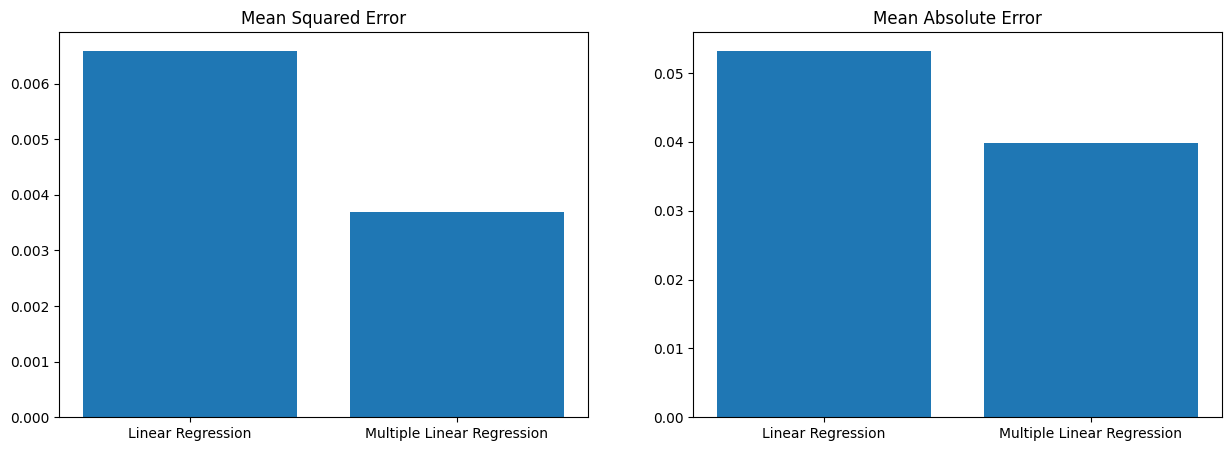

In [218]:
models = ['Linear Regression', 'Multiple Linear Regression']

mse_values = [mse, mse_mul]
mae_values = [mae, mae_mul]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].bar(models, mse_values)
ax[0].set_title('Mean Squared Error')

ax[1].bar(models, mae_values)
ax[1].set_title('Mean Absolute Error')

plt.show()


In [219]:
# now use sales price and GrLivArea and get overall quality

X_log = data[['OverallQual','GrLivArea']]
Y_log = np.log(data['SalePrice'])

X_log.shape, Y_log.shape


((1460, 2), (1460,))

In [220]:
X_log = scaler.fit_transform(X_log)

In [221]:
# split data
X_log_train, X_log_test, Y_log_train, Y_log_test = train_test_split(X_log, Y_log, test_size=0.2, random_state=42)

# log regression

In [222]:
lr_log = LinearRegression()
lr_log.fit(X_log_train, Y_log_train)

LinearRegression()

In [223]:
# test and errors
Y_log_pred = lr_log.predict(X_log_test)

mse_log = mean_squared_error(Y_log_test, Y_log_pred)
mae_log = mean_absolute_error(Y_log_test, Y_log_pred)

print(f"The mean squared error is {mse_log}")
print(f"The mean absolute error is {mae_log}")

The mean squared error is 0.040033006403836696
The mean absolute error is 0.14503296518789333


In [224]:
Y_log_test = Y_log_test
df = pd.DataFrame({'Y_test': Y_log_test, 'Y_pred': Y_log_pred})
df

,Y_test,Y_pred
892,11.947949,11.896027
1105,12.691580,12.630656
413,11.652687,11.710406
522,11.976659,12.042960
1036,12.661914,12.559391
...,...,...
479,11.401670,11.560039
1361,12.468437,12.185684
802,12.149502,12.167441
651,11.589887,11.653475


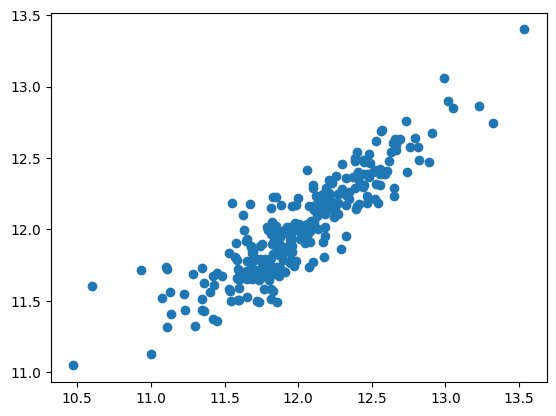

In [225]:
plt.scatter(Y_log_test, Y_log_pred)